###ASHRITHA K

In [125]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import style 
style.use('fivethirtyeight')
from wordcloud import WordCloud

### Importing the dataset

In [126]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

### Head of the dataset

In [127]:
#First 5 records of the dataset
df.head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<br><br>
# Exploratory Data analysis
<br>

###Shape of the Data

In [128]:
df.shape

(48895, 16)

### Information about the data

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Description about the dataset

In [130]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Are there any missing values?

In [131]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


###checking for duplicate rows

In [132]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 16)


###Detecting Outlier Using Quantile Percentage

In [133]:
Q1 =  df.quantile(0.25)
Q3 =  df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.830000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


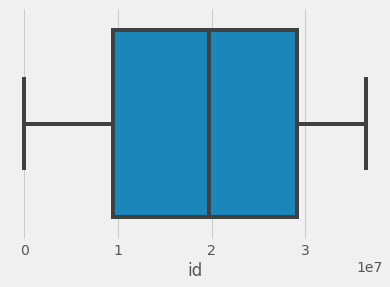

In [134]:
sns.boxplot(x=df['id'])

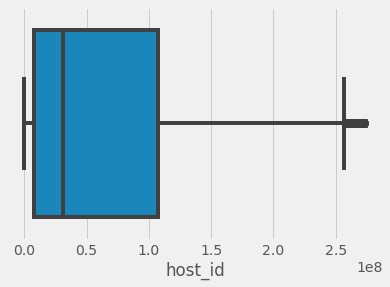

In [135]:
sns.boxplot(x=df['host_id'])

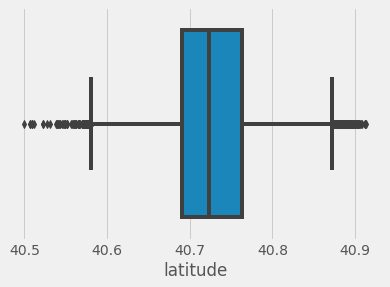

In [136]:
sns.boxplot(x=df['latitude'])

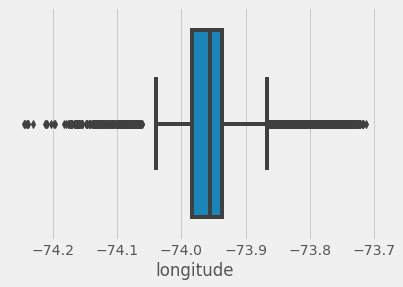

In [137]:
sns.boxplot(x=df['longitude'])

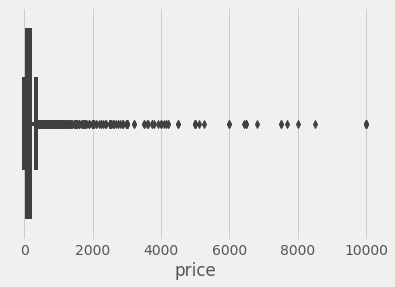

In [138]:
sns.boxplot(x=df['price'])

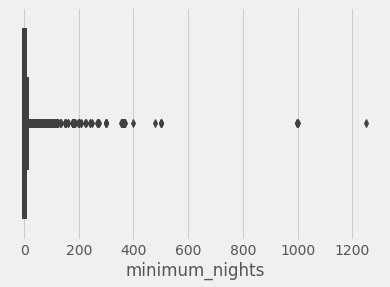

In [139]:
sns.boxplot(x=df['minimum_nights'])

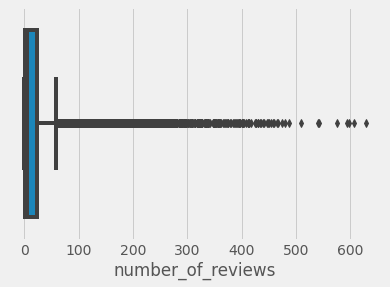

In [140]:
sns.boxplot(x=df['number_of_reviews'])

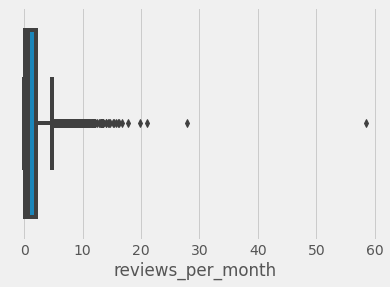

In [141]:
sns.boxplot(x=df['reviews_per_month'])

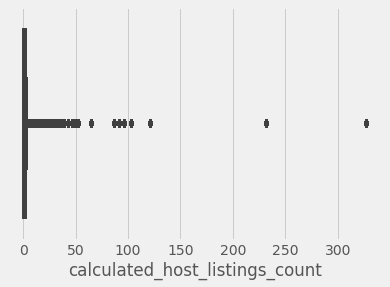

In [142]:
sns.boxplot(x=df['calculated_host_listings_count'])

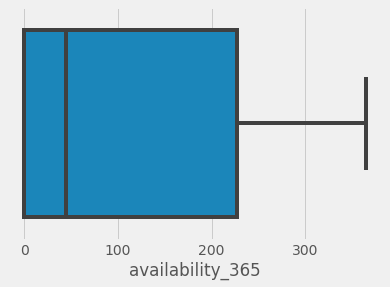

In [143]:
sns.boxplot(x=df['availability_365'])

### Correlation matrix & Matrix Visualisation

In [144]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


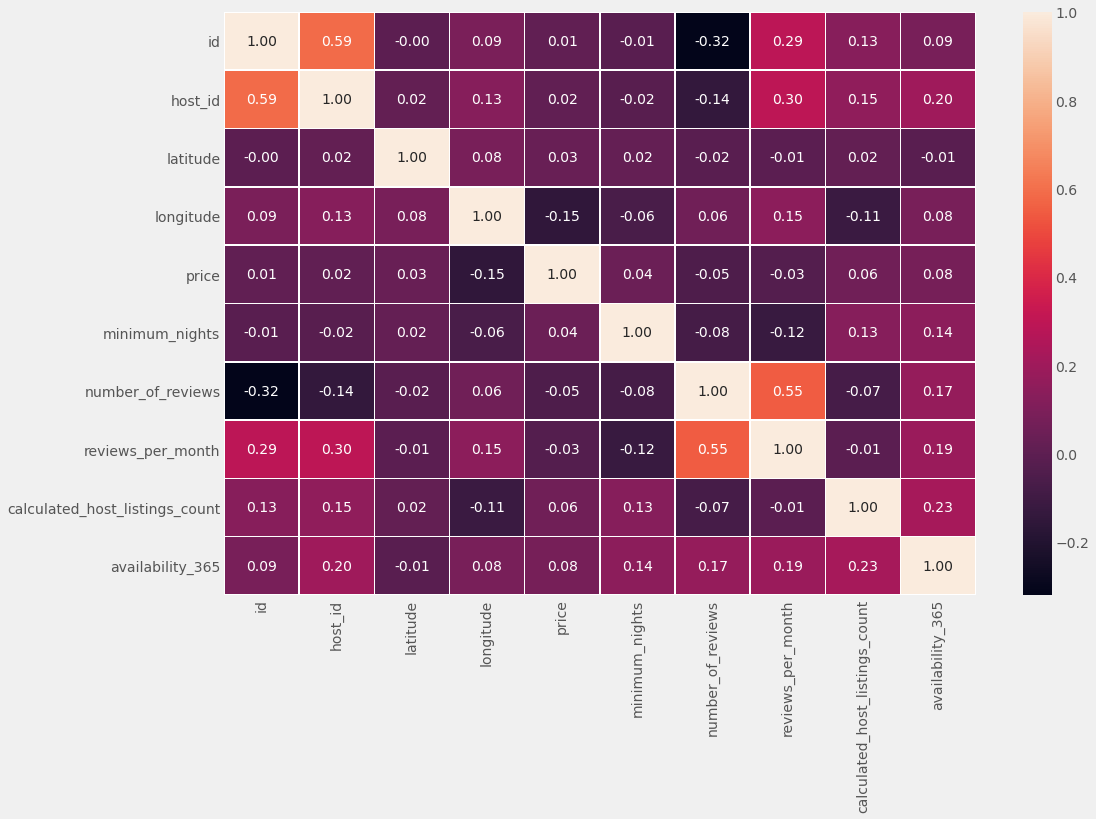

In [145]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

##Visualisation

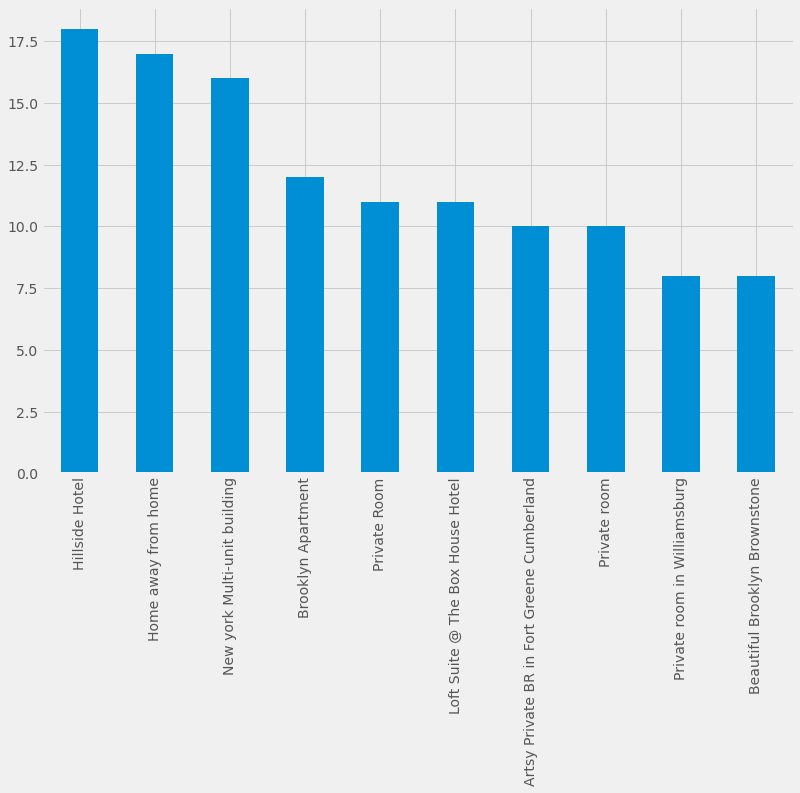

In [146]:
#visualizing the top 10 room names
top10=df.name.value_counts().head(10)
plt.figure(figsize=(12,8))
top10.plot(kind='bar')
plt.show()

In [147]:
# hosts (IDs) have the most listings on Airbnb platform
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [148]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

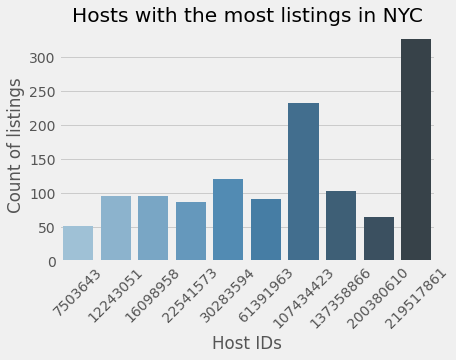

In [149]:
#visualising the most number of host id's
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [150]:
#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 500]


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

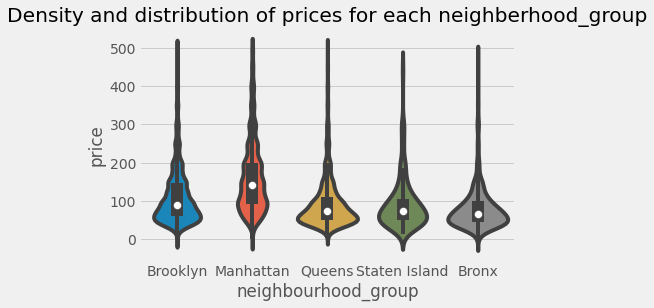

In [151]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


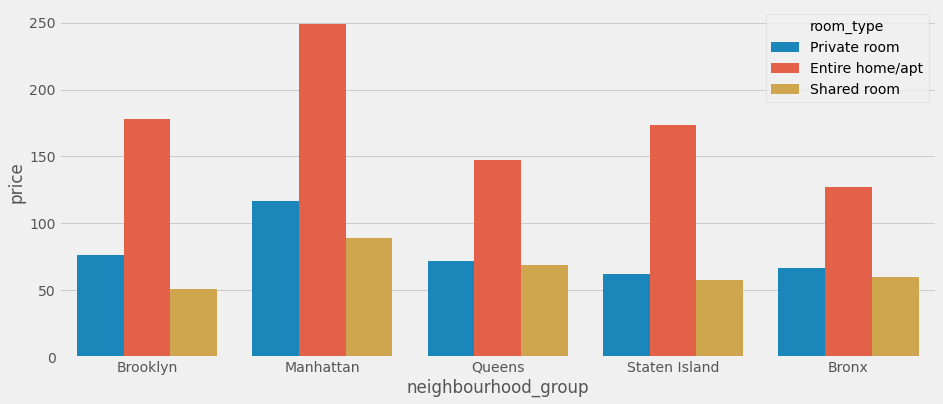

In [152]:
#using barplot to showcase price of different neighbourhood groups with respect to room types
plt.figure(figsize=(14, 6))
sns.barplot(df.neighbourhood_group, df.price, hue=df.room_type, ci=None)

The above bar plot demonstrates:<br>

Manhattan is the most expensive neighbourhood_group<br>
The price of entire home/apt is more than any other room type.<br>
Bronx is the cheapest.<br>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


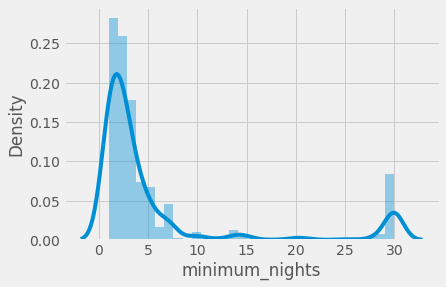

In [153]:
#distplot of minimum nights in range of 0 to 30
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()

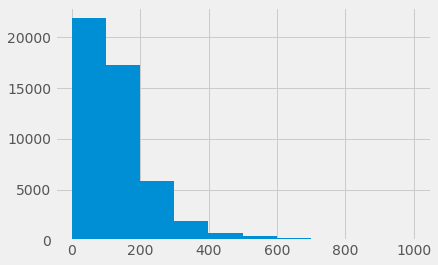

In [154]:
### Lets plot histogram for prices less than $1000
hist_price1=df["price"][df["price"]<1000].hist()

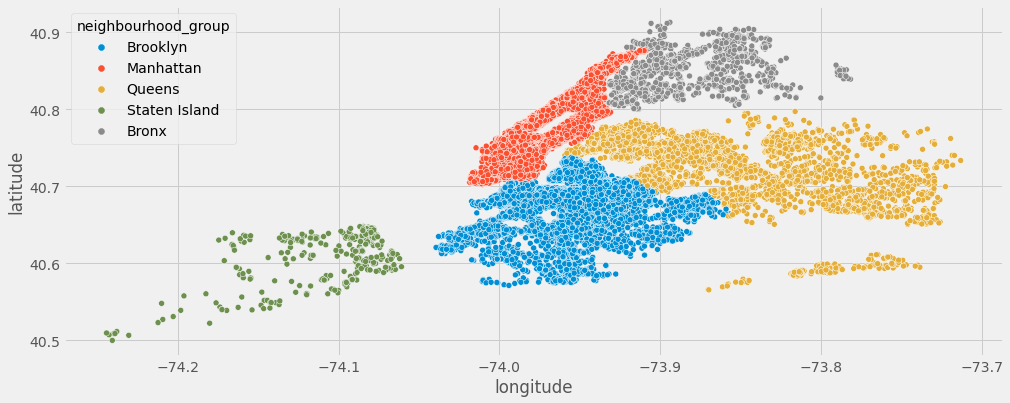

In [155]:
#scatterplot of neighbourd groups along logititude and latitude
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)

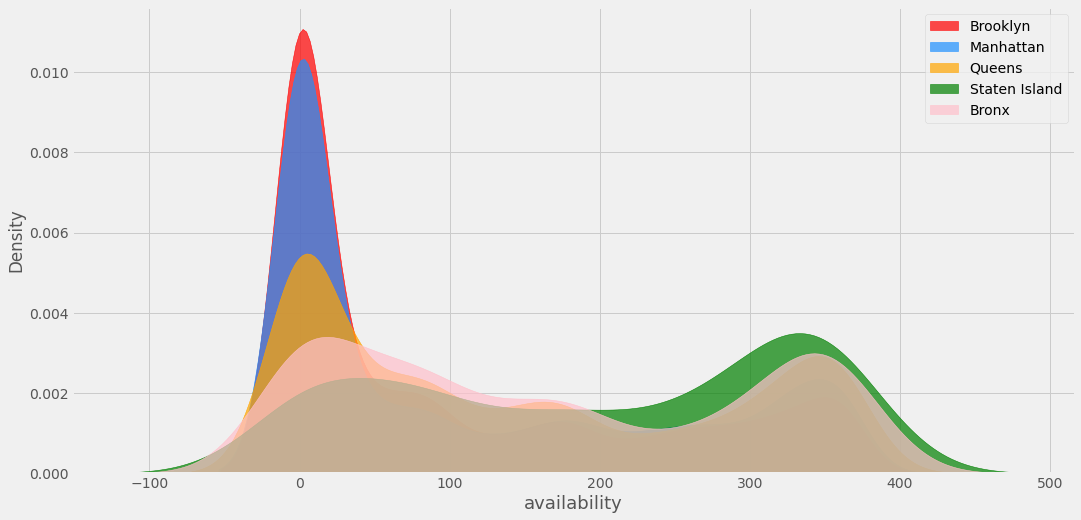

In [156]:
#kdeplots of room availability for  different neighbourhood groups
plt.figure(figsize=(16,8))
sns.kdeplot(df.loc[df['neighbourhood_group']=='Brooklyn','availability_365'],color='r',label='Brooklyn',shade=True,alpha=0.7)
sns.kdeplot(df.loc[df['neighbourhood_group']=='Manhattan','availability_365'],color='dodgerblue',label='Manhattan',shade=True,alpha=0.7)
sns.kdeplot(df.loc[df['neighbourhood_group']=='Queens','availability_365'],color='orange',label='Queens',shade=True,alpha=0.7)
sns.kdeplot(df.loc[df['neighbourhood_group']=='Staten Island','availability_365'],color='green',label='Staten Island',shade=True,alpha=0.7)
sns.kdeplot(df.loc[df['neighbourhood_group']=='Bronx','availability_365'],color='pink',label='Bronx',shade=True,alpha=0.7)    
plt.xlabel('availability',fontsize=18)
plt.legend()
plt.show()


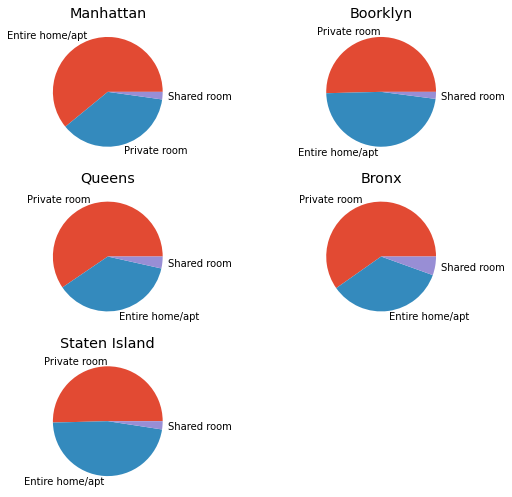

In [157]:
#pie charts for count of different room types in each neighbourhood group
style.use('ggplot')
fig,axes = plt.subplots(3,2,figsize=(8,8))
#     cities = df['neighbourhood_group'].unique()
#     fig,axes = plt.subplots(4,1)
room_list = df[df['neighbourhood_group']=='Manhattan']
room_list = room_list['room_type'].value_counts()
axes[0,0].pie(room_list,labels=room_list.index)
axes[0,0].set_title('Manhattan')
    
    
    
room_list = df[df['neighbourhood_group']=='Brooklyn']
room_list = room_list['room_type'].value_counts()
axes[0,1].pie(room_list,labels=room_list.index)
axes[0,1].set_title('Boorklyn')
    
    
room_list = df[df['neighbourhood_group']=='Queens']
room_list = room_list['room_type'].value_counts()
axes[1,0].pie(room_list,labels=room_list.index)
axes[1,0].set_title('Queens')
    
    
room_list = df[df['neighbourhood_group']=='Bronx']
room_list = room_list['room_type'].value_counts()
axes[1,1].pie(room_list,labels=room_list.index)
axes[1,1].set_title("Bronx")
    
    
room_list = df[df['neighbourhood_group']=='Staten Island']
room_list = room_list['room_type'].value_counts()
axes[2,0].pie(room_list,labels=room_list.index)
axes[2,0].set_title('Staten Island')
fig.delaxes(axes[2,1])        


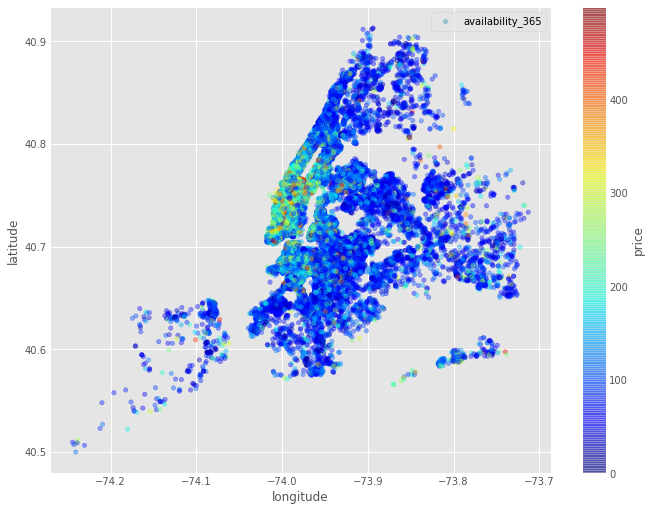

In [158]:
#scatterplot for room availability along with longtitude and latitude columns 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

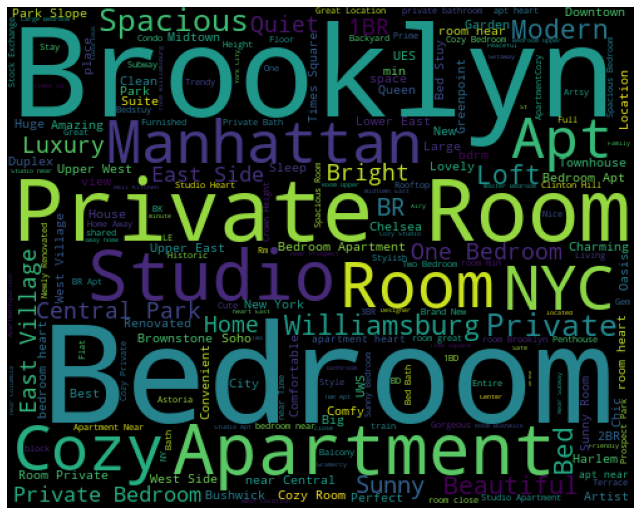

In [159]:
#word count visualisation of room names
words  = df['name'][~pd.isnull(df['name'])]
wordcloud = WordCloud(width=500,height=400).generate(''.join(words))
plt.figure(figsize=(10,14))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


In [160]:
#feature extraction of year and month from last_review
df['Year'] = pd.DatetimeIndex(df['last_review']).year 
df['month'] = pd.DatetimeIndex(df['last_review']).month

In [161]:
#sorting out the values of month and year
df = df.sort_values(['month','Year'])

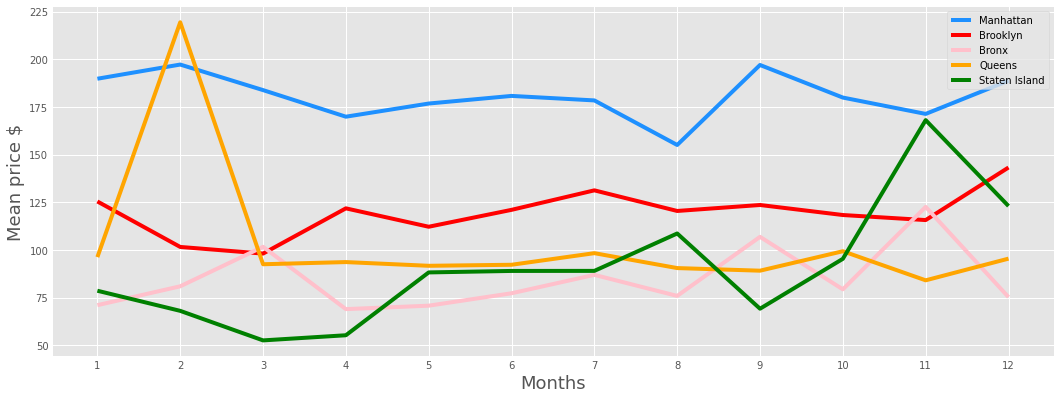

In [162]:
#Average(mean) price fluctuation over 12 months over different places.
def time_series_1(df):
    style.use('ggplot')
    plt.figure(figsize=(16,6))
    x_labels = [x for x in range(1,13)]
    colors = ['dodgerblue','red','pink','orange','green']
    for i  in range(len(df['neighbourhood_group'].unique())):
        temp_df = df[df['neighbourhood_group']==df['neighbourhood_group'].unique()[i]]
        temp_df2 = temp_df.groupby(['month']).mean()
        plt.plot(temp_df2.index,temp_df2['price'],color=colors[i])
    plt.xticks(temp_df2.index,x_labels)
    plt.xlabel('Months',fontsize=18)
    plt.ylabel('Mean price $',fontsize=18)
    plt.legend(['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island'],loc='upper right')
    plt.show()
time_series_1(df)   

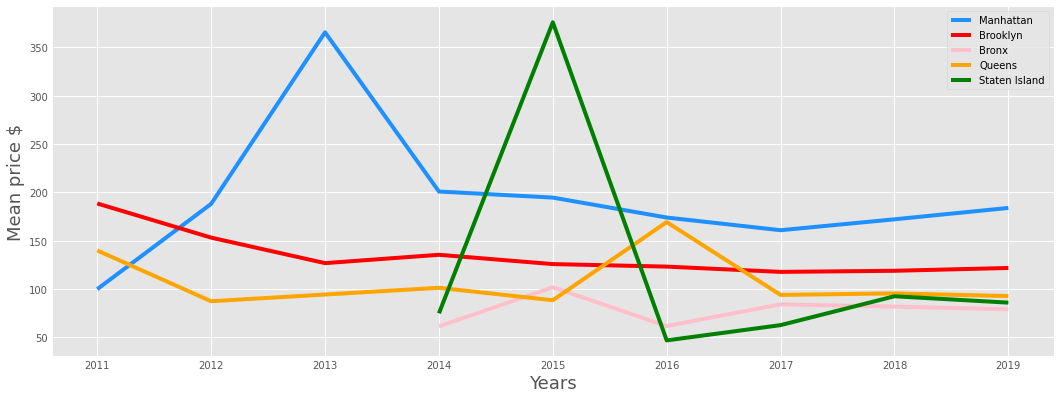

In [163]:

#Average(mean) price fluctuation over the years over different places.
def time_series_2(df):
    plt.figure(figsize=(16,6))
    style.use('ggplot')
    colors = ['dodgerblue','red','pink','orange','green']
    for i  in range(len(df['neighbourhood_group'].unique())):
        temp_df = df[df['neighbourhood_group']==df['neighbourhood_group'].unique()[i]]
        temp_df2 = temp_df.groupby(['Year']).mean()
        plt.plot(temp_df2.index,temp_df2['price'],color=colors[i])
    plt.xlabel('Years',fontsize=18)
    plt.ylabel('Mean price $',fontsize=18)
    plt.legend(['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island'],loc='upper right')
    plt.show()
time_series_2(df) 